<a href="https://colab.research.google.com/github/AgustinCocciardi/TP-Ciencia-de-Datos/blob/main/TP_EntregableVirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Práctico

#### 01-3900 | Ciencia de datos | 2024

Alumno: Cocciardi Agustin Ignacio

## Enunciado

Se tienen un dataset con datos de pacientes internados en un hospital (TP_Virus_Alumnos.csv). La clase de interes (1) refiere a la presencia de un virus. El virus tiene normalmente una gravedad leve/baja y el tratamiento suele ser invasivo. Datos como nombre y apellido han sido eliminados y los valores tanto en sangre (BLD), hormonales u otros análisis sobre reactivos han sido alterados en sus valores para preservar la privacidad. Se aclara que no se ha modificado su capacidad predictiva (Si es que la tienen).


Para su conocimiento: </BR>
Datos generales de Edad, Peso, Altura y condición laboral (Activo, Pasivo etc).
Datos medidos en hospital:</BR>
BLD: Sangre</BR>
LVL: Hormonales</BR>
REC: Otros análisis</BR>

Se pide obtener con los datos disponibles el mejor modelo posible que prediga la presencia o ausencia del virus.
Dado que el tratamiento es invasivo y la grevedad es moderada se requiere "atrapar" tantos "1" como sea posible y minimizar los falsos positivos para evitar que reciban un tratamiento de estas caracteristicas personas que no presentan el virus. Intente obtener el mejor modelo que maximice la métrica que considere correspondiente.



## Como desarrollar el exámen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general.

La nota derivará de: </BR>
1.La calidad de la clasificación realizada</BR>
2.La fundamentación de los pasos realizados</BR>
3.Lo sencillo de llevar a producción el desarrollo</BR>



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medición y la medición del docente recuerde y aplique conceptos de test, validación cruzada y evite los errores comunes de sesgo de selección y fuga de datos (PPT/Pdf Árboles de clasificación) o  Sklearn "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html"   

Al final del notebook encontrará un bloque de código que lee la muestra adicional (a la que usted no tiene acceso) si PRODUCCION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el código funciona. Desarrolle el notebook como considere, para finalmente asignar el mejor clasificador que usted haya obtenido remplazando en f_clf = None, None por su clasificador. Implemente todas las transformaciones entre esa lí­nea y la predición final (Evitando la fuga de datos). Ver TP_AutomatizarTransformaciones.ipynb

En materiales del MIEL se adjunta un notebook que propone algunas ideas para automatizar el proceso.

## Evaluacion final - Docente + Alumno

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

PRODUCCION = False
best_clf = None #Asignar aqui el mejor clasificador posible (previamente entrenado)

#Leemos el dataset de evaluacion, simulando produccion
if PRODUCCION==False:
    df = pd.read_csv("TP_Virus_Alumnos.csv")
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv("TP_Virus_Evaluacion.csv")
#Dividimos en target y predictoras

X_prod = df.drop("target", axis=1)
y_prod = df["target"]

#Transformaciones


#Evaluacion final
y_pred = best_clf.predict(X_prod)
print(classification_report(y_prod, y_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'TP_Virus_Alumnos.csv'

# Desarrollo del TP

## Exploración de datos

Importo los datos

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("TP_Virus_Alumnos.csv")

Muestro el dataset

In [ ]:
df

,Edad,Genero,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,LVL,target
0,9.0,Femenino,36.410602,Inactivo,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,51.411632,0
1,58.0,Masculino,115.507184,Inactivo,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,1000000.000000,0
2,74.0,Masculino,81.249035,Activo,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1000000.000000,1
3,NaN,Masculino,77.985589,No_declara,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,NaN,0
4,1.0,Femenino,13.446208,Inactivo,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,21.627303,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,45.0,NaN,90.221760,Activo,1,1.660127,2.720841,64.551161,74.409061,15.196857,90.130661,0.936022,0.292744,112.514342,0
4196,9.0,Masculino,37.949680,Inactivo,0,2.001270,3.892882,64.271080,71.905067,15.192511,89.164612,2.887523,0.694750,1000000.000000,1
4197,24.0,Masculino,72.322983,Activo,1,1.598071,5.566376,65.217362,70.912155,15.975612,89.835998,-0.490912,1.572128,100.452789,1
4198,16.0,NaN,56.321757,Inactivo,0,1.804688,3.494108,61.385971,74.595457,14.696368,91.129958,1.937261,0.428380,82.772516,0


Muestro los nulos de mi dataset (puedo observar que en Edad, Género y LVL tengo bastantes valores nulos que tendré que imputar).

Más abajo analizo el porcentaje de nulos en relación a la cantidad de registros. La columna LVL tiene un 12,5% de nulos, la columna Edad posee un 19.5% de valores nulos. Mientras que en Genero tengo un 40% de los registros nulos. Eliminar los registros donde la columna género sea nula me quitará el 40% de mi dataset, pero una opción podría ser eliminar la columna.

In [ ]:
df.isnull().sum()

Edad        822
Genero     1682
Peso          0
Laboral       0
hijos         0
BLD01         0
REC1          0
REC2          0
REC3          0
REC4          0
REC5          0
BLD02         0
BLD03         0
LVL         527
target        0
dtype: int64

In [ ]:
round((df.isnull().sum()/df.shape[0])*100,2)

Edad       19.57
Genero     40.05
Peso        0.00
Laboral     0.00
hijos       0.00
BLD01       0.00
REC1        0.00
REC2        0.00
REC3        0.00
REC4        0.00
REC5        0.00
BLD02       0.00
BLD03       0.00
LVL        12.55
target      0.00
dtype: float64

Uso dtypes para ver el tipo de las columnas. Casi todas son enteros o flotantes, con la excepción de Genero y Laboral, que son categóricas

In [ ]:
df.dtypes

Edad       float64
Genero      object
Peso       float64
Laboral     object
hijos        int64
BLD01      float64
REC1       float64
REC2       float64
REC3       float64
REC4       float64
REC5       float64
BLD02      float64
BLD03      float64
LVL        float64
target       int64
dtype: object

Considero que la columna género no es tan importante para el análisis de la presencia de un virus en la persona. En caso de tratarse de un dataset que analizara la disparidad salarial entre hombres y mujeres, podría optar por tratar la columna. En este caso, la quitaré de mi dataset.

In [ ]:
df = df.drop(columns=['Genero'])
df

,Edad,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,LVL,target
0,9.0,36.410602,Inactivo,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,51.411632,0
1,58.0,115.507184,Inactivo,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,1000000.000000,0
2,74.0,81.249035,Activo,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1000000.000000,1
3,NaN,77.985589,No_declara,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,NaN,0
4,1.0,13.446208,Inactivo,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,21.627303,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,45.0,90.221760,Activo,1,1.660127,2.720841,64.551161,74.409061,15.196857,90.130661,0.936022,0.292744,112.514342,0
4196,9.0,37.949680,Inactivo,0,2.001270,3.892882,64.271080,71.905067,15.192511,89.164612,2.887523,0.694750,1000000.000000,1
4197,24.0,72.322983,Activo,1,1.598071,5.566376,65.217362,70.912155,15.975612,89.835998,-0.490912,1.572128,100.452789,1
4198,16.0,56.321757,Inactivo,0,1.804688,3.494108,61.385971,74.595457,14.696368,91.129958,1.937261,0.428380,82.772516,0


Imputar la edad: calculo la media, la mediana y la moda de la columna edad de mi dataset

In [ ]:
print("Media: ", df['Edad'].mean())
print("Mediana: ", df['Edad'].median())
print("Moda: ", df['Edad'].mode())


Media:  38.65808170515098
Mediana:  38.0
Moda:  0    16.0
Name: Edad, dtype: float64


Voy a quedarme con la mediana para imputar las edades nulas.

In [ ]:
df['Edad'].fillna(df['Edad'].median(), inplace=True)

Imputar LVL: puedo darme cuenta que en LVL, además de contar con valores nulos, poseo outliers. Valores anómalos que pueden afectar mi dataset.

<Axes: ylabel='Frequency'>

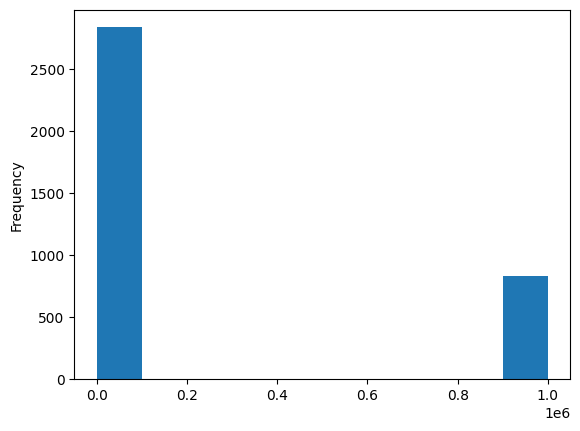

In [ ]:
df['LVL'].plot(kind='hist')

<Axes: ylabel='Frequency'>

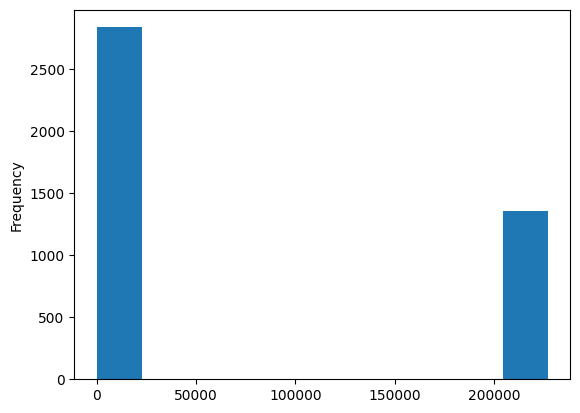

In [ ]:
# Obtenemos la media
media_LVL = df['LVL'].mean()

# Reemplazamos las edades nulas por la media.
df['LVL'] = df['LVL'].fillna(media_LVL)

# Empezamos el proceso para obtener los outliers
Q1 = df['LVL'].quantile(0.25) # Primer Cuartil
Q3 = df['LVL'].quantile(0.75) # Tercer Cuartil
IQR = Q3 - Q1 # Rango intercuartilico

# Definimos los limites para identificar los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers = df[(df['LVL'] < lower_bound) | (df['LVL'] > upper_bound)]

# Reemplazamos los outliers con la media
df.loc[outliers.index, 'LVL'] = media_LVL

# Mostramos el dataset
df['LVL'].plot(kind='hist')

Todavía tenemos registros outliers. Seguiremos imputando

In [ ]:
df['LVL']

0           51.411632
1       227134.359847
2       227134.359847
3       227134.359847
4           21.627303
            ...      
4195       112.514342
4196    227134.359847
4197       100.452789
4198        82.772516
4199       130.228109
Name: LVL, Length: 4200, dtype: float64

Dado a que tengo un valor muy grande, el cálculo de los cuartiles me está llevando a límites inferiores y superiores bastante notorios. No está detectando el valor 227134.3598 como outlier dado a que el límite superior es todavía más grande, por lo que obtendremos la mediana de la columna excluyendo ese valor, y luego, reemplazaremos ese valor por la media obtenida.

In [ ]:
# Encuentra el valor máximo en la columna "LVL"
valor_maximo = df['LVL'].max()

# Calcula la media de los valores que no son iguales al máximo
media_sin_maximo = np.mean(df[df['LVL'] != valor_maximo]['LVL'])

# Reemplaza todos los valores máximos en la columna "LVL" con la media calculada
df.loc[df['LVL'] == valor_maximo, 'LVL'] = media_sin_maximo

print("Valor máximo de la columna LVL:", valor_maximo)
print("Media de la columna LVL sin el valor máximo:", media_sin_maximo)
print("DataFrame con los valores máximos reemplazados por la media:")
print(df)

Valor máximo de la columna LVL: 227134.35984748596
Media de la columna LVL sin el valor máximo: 93.16791821625061
DataFrame con los valores máximos reemplazados por la media:
      Edad        Peso     Laboral  hijos     BLD01      REC1       REC2  \
0      9.0   36.410602    Inactivo      0  3.139714  6.929112  63.712640   
1     58.0  115.507184    Inactivo      4  2.953914  4.660136  64.582610   
2     74.0   81.249035      Activo      3  1.365200  3.005861  63.613454   
3     38.0   77.985589  No_declara      0  2.329285  4.344642  64.433115   
4      1.0   13.446208    Inactivo      0 -0.062975  3.938741  65.122602   
...    ...         ...         ...    ...       ...       ...        ...   
4195  45.0   90.221760      Activo      1  1.660127  2.720841  64.551161   
4196   9.0   37.949680    Inactivo      0  2.001270  3.892882  64.271080   
4197  24.0   72.322983      Activo      1  1.598071  5.566376  65.217362   
4198  16.0   56.321757    Inactivo      0  1.804688  3.494108  61

Ahora que mi dataset no tiene nulos, puedo empezar a trabajar.

In [ ]:
df1 = df
df1

,Edad,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,LVL,target
0,9.0,36.410602,Inactivo,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,51.411632,0
1,58.0,115.507184,Inactivo,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,93.167918,0
2,74.0,81.249035,Activo,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,93.167918,1
3,38.0,77.985589,No_declara,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,93.167918,0
4,1.0,13.446208,Inactivo,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,21.627303,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,45.0,90.221760,Activo,1,1.660127,2.720841,64.551161,74.409061,15.196857,90.130661,0.936022,0.292744,112.514342,0
4196,9.0,37.949680,Inactivo,0,2.001270,3.892882,64.271080,71.905067,15.192511,89.164612,2.887523,0.694750,93.167918,1
4197,24.0,72.322983,Activo,1,1.598071,5.566376,65.217362,70.912155,15.975612,89.835998,-0.490912,1.572128,100.452789,1
4198,16.0,56.321757,Inactivo,0,1.804688,3.494108,61.385971,74.595457,14.696368,91.129958,1.937261,0.428380,82.772516,0
